In [2]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

In [3]:
with open('/home/jak/Desktop/DL/Facial Expression/face2', 'rb') as f:
    model = pickle.load(f)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
cap = cv2.VideoCapture(0)

if cap.isOpened():
    ret, frame = cap.read()
else:
    ret = False
img=frame
#img1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cap.release()

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
img=frame
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

In [7]:
img1 = img[y:y+h, x:x+w]

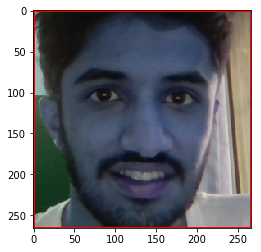

In [8]:
plt.imshow(img1)        #many attributes
plt.show()

In [9]:
def resize2SquareKeepingAspectRation(img, interpolation, size=48):
    h, w = img.shape[:2]
    c = 1 if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h
    else:     dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

In [10]:
img1 = resize2SquareKeepingAspectRation(img1, cv2.INTER_AREA)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [11]:
array=[]
array.insert(0,img1)
x=np.asarray(array)
x = x.reshape(1,48,48,1)
p=model.predict(x)

In [12]:
mylist=np.array(p).tolist()
ind = np.argmax(mylist)

In [13]:
if ind==0: print('Angry')
elif ind==1: print('Dsigust')
elif ind==2: print('Fear')
elif ind==3: print('Happy')
elif ind==4: print('Sad')
elif ind==5: print('Surprise')
else :print('Neutral')

Happy
